# Settings

In [26]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 2]

In [7]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/MyDrive/COLAB/tensorflow/1_Intro

Mounted at /gdrive
/gdrive/MyDrive/COLAB/tensorflow/1_Intro


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
#@title parameters

# model
NB_CLASSES=2
N_HIDDEN=32

# training
VERBOSE=1
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

# Utils

In [28]:
#@title plot_loss_acc
def plot_loss_acc(history):
  train_acc = history.history[     'accuracy' ]
  val_acc = history.history[ 'val_accuracy' ]
  train_loss = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(train_acc))

  # plot training and validation accuracy per epoch
  plt.subplot(1, 3, 1)
  plt.plot  ( epochs,     train_acc )
  plt.plot  ( epochs, val_acc )
  plt.title ( 'Accuracy' )

  # plot training and validation loss per epoch
  plt.subplot(1, 3, 2)
  plt.plot  ( epochs,     train_loss )
  plt.plot  ( epochs, val_loss )
  plt.title ( 'Loss' )

  # subplot for legend
  plt.subplot(1, 3, 3)
  plt.plot([], [], label='Plot 1')
  plt.plot([], [], label='Plot 2')
  plt.legend(loc='upper left')
  plt.axis('off')

  plt.tight_layout(rect=[0, 0, 2, 1])
  plt.legend(['training', 'validation'], loc='upper left')
  plt.show();

# Dataset

In [9]:
#Load Spam Data and review content
spam_data = pd.read_csv("data/spam_ham.csv")

print("\nLoaded Data :\n------------------------------------")
print(spam_data.head())


Loaded Data :
------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [10]:
#Separate feature and target data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]

In [17]:
# remove stopwords and lemmatize
lemmatizer = WordNetLemmatizer()

def tokenize(msg):
    tokens = nltk.word_tokenize(msg)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [18]:
# vectorize data

vectorizer = TfidfVectorizer(tokenizer=tokenize)

tfidf = vectorizer.fit_transform(spam_messages) # transform feature input to TF-IDF
tfidf_array = tfidf.toarray() # convert TF-IDF to numpy array

label_encoder = preprocessing.LabelEncoder() # build a label encoder for target variable to convert strings to numeric values
spam_classes = label_encoder.fit_transform(spam_classes_raw)
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2) # convert target to one-hot encoding vector

print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

TF-IDF Matrix Shape :  (1500, 4566)
One-hot Encoding Shape :  (1500, 2)


In [19]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

# Model

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(N_HIDDEN, input_shape=(X_train.shape[1],), name='Hidden-Layer-1', activation='relu'))
model.add(tf.keras.layers.Dense(N_HIDDEN, name='Hidden-Layer-2', activation='relu'))
model.add(tf.keras.layers.Dense(NB_CLASSES, name='Output-Layer', activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147,266
Trainable params: 147,266
Non-trainable params: 0
_________________________________________________________________


# Training

In [25]:
history=model.fit(X_train,
                  Y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=VERBOSE,
                  validation_split=VALIDATION_SPLIT)

Epoch 1/10
5/5 [==============================] - 2s 123ms/step - loss: 0.6916 - accuracy: 0.5556 - val_loss: 0.6876 - val_accuracy: 0.4889
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 0.6786 - accuracy: 0.6287 - val_loss: 0.6704 - val_accuracy: 0.7889
Epoch 3/10
5/5 [==============================] - 0s 31ms/step - loss: 0.6545 - accuracy: 0.8861 - val_loss: 0.6448 - val_accuracy: 0.9037
Epoch 4/10
5/5 [==============================] - 0s 35ms/step - loss: 0.6212 - accuracy: 0.9528 - val_loss: 0.6133 - val_accuracy: 0.9296
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 0.5795 - accuracy: 0.9694 - val_loss: 0.5759 - val_accuracy: 0.9370
Epoch 6/10
5/5 [==============================] - 0s 31ms/step - loss: 0.5314 - accuracy: 0.9787 - val_loss: 0.5371 - val_accuracy: 0.9333
Epoch 7/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4801 - accuracy: 0.9815 - val_loss: 0.4987 - val_accuracy: 0.9222
Epoch 8/10
5/5 [==========

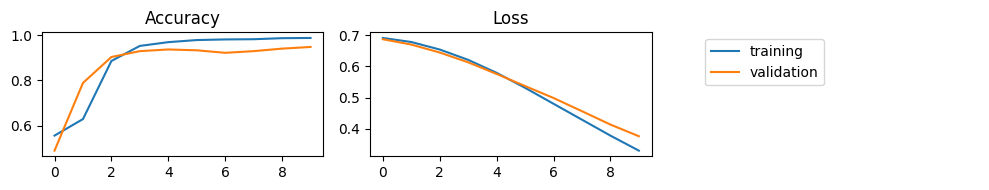

5/5 [==============================] - 0s 7ms/step - loss: 0.3617 - accuracy: 0.9733

Evaluation against Test Dataset: [0.3617005944252014, 0.9733333587646484]


In [30]:
plot_loss_acc(history)

print(f"\nEvaluation against Test Dataset: {model.evaluate(X_test,Y_test)}")

# Predict

In [35]:
# Predict for multiple samples using batch processing

# Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf = vectorizer.transform(["FREE entry to a fun contest",
                                      "Yup I will come over"]).toarray()

print("Input shape:", predict_tfidf.shape)

# Predict using model
prediction = np.argmax(model.predict(predict_tfidf, verbose=0), axis=1)
print("Prediction Output:" , prediction)
print("Prediction Classes:", label_encoder.inverse_transform(prediction))

Input shape: (2, 4566)
Prediction Output: [1 0]
Prediction Classes: ['spam' 'ham']
